In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
from IPython import display 

from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier

In [2]:
!pip install tslearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 13.7 MB/s 


In [3]:
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler


In [4]:
!git clone https://github.com/nghi-huynh/BigDataChallenge2022.git

Cloning into 'BigDataChallenge2022'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 168 (delta 57), reused 134 (delta 26), pack-reused 0
Receiving objects: 100% (168/168), 29.68 MiB | 22.31 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [5]:
!mv /content/BigDataChallenge2022/processed_data .
!rm -r /content/BigDataChallenge2022

# EDA

In [6]:
df = pd.read_csv('/content/processed_data/final_processed_data.csv')

We will analyze our dataset based on **yearly predictions**.

In [ ]:
df

,Entity,Year,Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent),Deaths - Self-harm - Sex: Both - Age: All Ages (Percent),Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate),gdp_current,gdp_per_capita,health expenditure (per capita),health expenditure (% GDP),unemployment rate,Income group,Income,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Suicide rate
0,Afghanistan,2000,17.939269,0.442532,0.090314,1.683090e+10,489.923884,47.922003,9.861581,10.806,Low income,530.0,1.893882,7.7
1,Afghanistan,2001,17.933525,0.457531,0.084862,1.683090e+10,489.923884,47.922003,9.861581,10.809,Low income,530.0,1.963984,7.9
2,Afghanistan,2002,17.916547,0.461904,0.081991,4.055180e+09,179.426579,15.803164,9.443390,11.257,Low income,530.0,2.090646,7.9
3,Afghanistan,2003,17.889702,0.490590,0.081942,4.515559e+09,190.683814,17.035744,8.941258,11.141,Low income,530.0,2.240707,7.7
4,Afghanistan,2004,17.859903,0.514944,0.082468,5.226779e+09,211.382074,20.412764,9.808474,10.988,Low income,530.0,2.360176,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255,Zimbabwe,2015,11.156429,1.676438,1.413464,1.996312e+10,1445.069702,107.686999,7.452066,4.778,Lower middle income,1280.0,2.193166,30.7
3256,Zimbabwe,2016,11.164133,1.747906,1.445058,2.054868e+10,1464.588957,112.411404,7.675163,4.788,Lower middle income,1290.0,2.279813,28.7
3257,Zimbabwe,2017,11.170427,1.804474,1.470020,1.758489e+10,1235.189032,115.646201,7.469752,4.785,Lower middle income,1390.0,2.364265,25.9
3258,Zimbabwe,2018,11.158765,1.870430,1.378207,1.811554e+10,1254.642265,141.369308,8.680062,4.796,Lower middle income,1410.0,2.472949,23.9


Here is the evolution of a few features over time:

In [ ]:
df.columns

Index(['Entity', 'Year',
       'Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Deaths - Self-harm - Sex: Both - Age: All Ages (Percent)',
       'Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate)',
       'gdp_current', 'gdp_per_capita', 'health expenditure (per capita)',
       'health expenditure (% GDP)', 'unemployment rate', 'Income group',
       'Income',
       'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',
       'Suicide rate'],
      dtype='object')

In [ ]:
year = pd.DataFrame(df['Year'])[0:20]

In [ ]:
plot_cols = ['Deaths - Self-harm - Sex: Both - Age: All Ages (Percent)', 'health expenditure (per capita)','unemployment rate']

df_sub = df[plot_cols].loc[df['Entity']=='Canada']

In [ ]:
df_sub

,Deaths - Self-harm - Sex: Both - Age: All Ages (Percent),health expenditure (per capita),unemployment rate
540,2.030059,2007.880859,6.83
541,2.014213,2063.927490,7.22
542,1.981742,2159.315918,7.66
543,1.964556,2562.914551,7.57
544,1.926634,2925.067139,7.19
545,1.917180,3296.501465,6.76
546,1.896588,3788.090088,6.32
547,1.888389,4212.990723,6.04
548,1.885977,4474.974609,6.14
549,1.904711,4371.552734,8.34


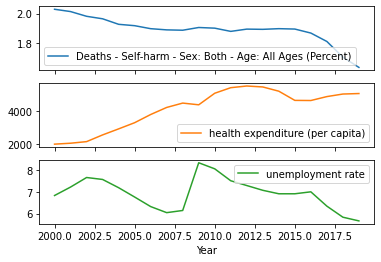

In [ ]:
plot_features = df_sub
plot_features.index = df['Year'].loc[df['Entity']=='Canada']
_ = plot_features.plot(subplots=True)


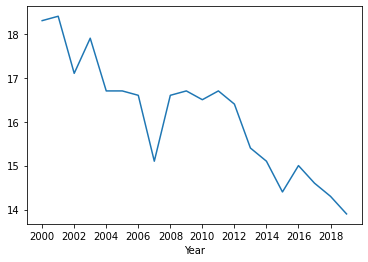

In [ ]:
plot_features = df['Suicide rate'].loc[df['Entity']=='Belgium']
plot_features.index = df['Year'].loc[df['Entity']=='Belgium']
plt.xticks(np.arange(2000,2020,2))
_ = plot_features.plot(subplots=True)

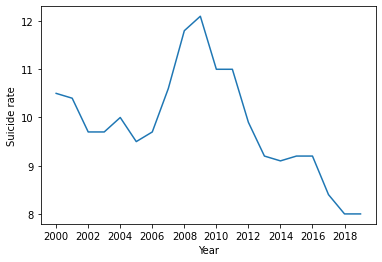

In [ ]:
plot_features = df['Suicide rate'].loc[df['Entity']=='Chile']
plot_features.index = df['Year'].loc[df['Entity']=='Chile']
plt.ylabel('Suicide rate')
plt.xticks(np.arange(2000,2020,2))
_ = plot_features.plot(subplots=True)

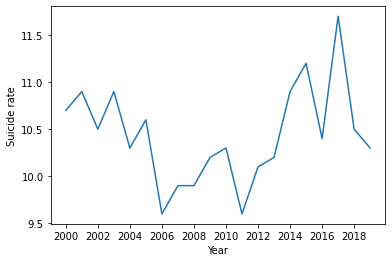

In [ ]:
plot_features = df['Suicide rate'].loc[df['Entity']=='Canada']
plot_features.index = df['Year'].loc[df['Entity']=='Canada']
plt.ylabel('Suicide rate')
plt.xticks(np.arange(2000,2020,2))
_ = plot_features.plot(subplots=True)

([<matplotlib.axis.XTick at 0x7f6a69b59050>,
 <a list of 10 Text major ticklabel objects>)

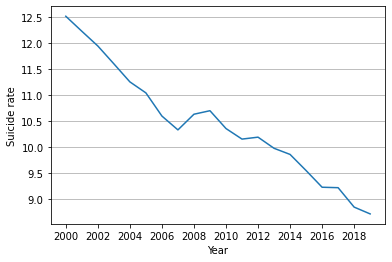

In [ ]:
sns.lineplot(y=df.loc[df['Income group']=='High income']['Suicide rate'],x=df.loc[df['Income group']=='High income']['Year'],ci=None,dashes=False).grid(axis='y')
#sns.lineplot(x=pred['Year'],y=pred['Suicide rate predicted'],ci=None)
#plt.legend(['Actual','Predicted'])
#plt.title('Actual vs Predicted Suicide Rate for High income group', fontsize=12, fontweight='bold')
plt.xticks(np.arange(2000,2020,2))

## Line graphs - Year

**Trend of suicide rate in different income groups (2000-2019)**

In [ ]:
df_trend = df.loc[df['Income group']=='Low income']
df_trend

,Entity,Year,Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent),Deaths - Self-harm - Sex: Both - Age: All Ages (Percent),Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate),gdp_current,gdp_per_capita,health expenditure (per capita),health expenditure (% GDP),unemployment rate,Income group,Income,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Suicide rate
0,Afghanistan,2000,17.939269,0.442532,0.090314,1.683090e+10,489.923884,47.922003,9.861581,10.806,Low income,530.0,1.893882,7.7
1,Afghanistan,2001,17.933525,0.457531,0.084862,1.683090e+10,489.923884,47.922003,9.861581,10.809,Low income,530.0,1.963984,7.9
2,Afghanistan,2002,17.916547,0.461904,0.081991,4.055180e+09,179.426579,15.803164,9.443390,11.257,Low income,530.0,2.090646,7.9
3,Afghanistan,2003,17.889702,0.490590,0.081942,4.515559e+09,190.683814,17.035744,8.941258,11.141,Low income,530.0,2.240707,7.7
4,Afghanistan,2004,17.859903,0.514944,0.082468,5.226779e+09,211.382074,20.412764,9.808474,10.988,Low income,530.0,2.360176,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,Yemen,2015,15.838019,0.823169,0.108293,4.244510e+10,1601.830063,73.176743,4.252858,13.770,Low income,1200.0,4.752210,6.8
3216,Yemen,2016,15.928825,0.806922,0.113830,3.131737e+10,1152.720966,62.396828,5.177634,13.433,Low income,1150.0,4.640163,7.0
3217,Yemen,2017,16.072402,0.820759,0.119687,2.684013e+10,964.264810,62.396828,5.177634,13.297,Low income,1070.0,4.677782,6.9
3218,Yemen,2018,16.220943,0.797014,0.081976,2.160614e+10,758.145242,62.396828,5.177634,13.145,Low income,940.0,4.684685,7.1


In [ ]:
df_trend.dtypes

Entity                                                                                              object
Year                                                                                                 int64
Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)                        float64
Deaths - Self-harm - Sex: Both - Age: All Ages (Percent)                                           float64
Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate)             float64
gdp_current                                                                                        float64
gdp_per_capita                                                                                     float64
health expenditure (per capita)                                                                    float64
health expenditure (% GDP)                                                                         float64
unemployment rate                    

In [ ]:
order=['Low income','Lower middle income','Upper middle income','High income']

### Suicide rate

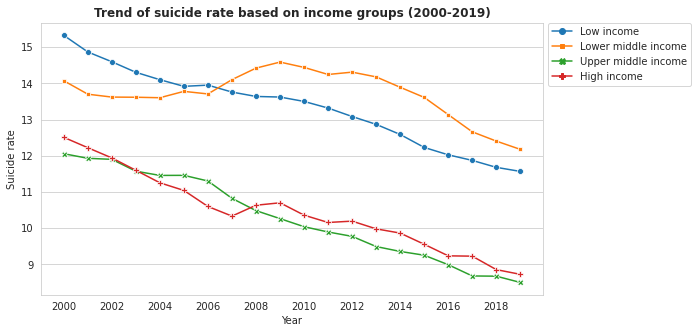

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(9,5))
sns.lineplot(data=df,x="Year",y="Suicide rate",hue="Income group",
             style="Income group",markers=True, dashes=False,hue_order=order,
             ci=None).grid(axis='x')
plt.title('Trend of suicide rate based on income groups (2000-2019)', fontsize=12, fontweight='bold')
plt.xticks(np.arange(2000,2020,2))
plt.legend(bbox_to_anchor=(1.0,0.75),loc="lower left")

plt.show()

### Health expenditure (per capita)

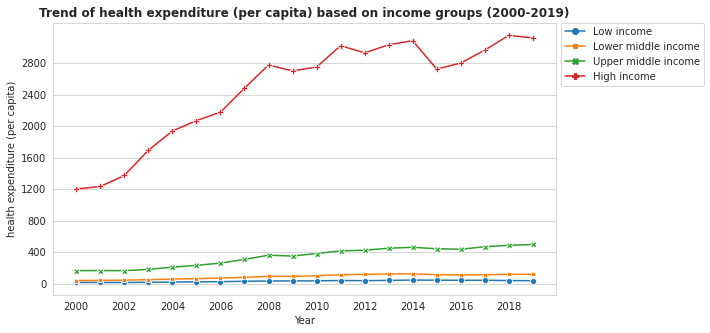

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(9,5))
sns.lineplot(data=df,x="Year",y="health expenditure (per capita)",hue="Income group",
             style="Income group",markers=True, dashes=False,hue_order=order,
             ci=None).grid(axis='x')
plt.title('Trend of health expenditure (per capita) based on income groups (2000-2019)', fontsize=12, fontweight='bold')
plt.xticks(np.arange(2000,2020,2))
plt.yticks(np.arange(0,3200,400))
plt.legend(bbox_to_anchor=(1.0,0.75),loc="lower left")
plt.show()

### Unemployment rate

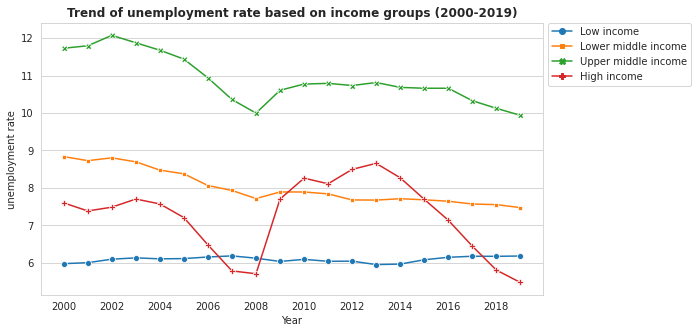

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(9,5))
sns.lineplot(data=df,x="Year",y="unemployment rate",hue="Income group",
             style="Income group",markers=True, dashes=False,hue_order=order,
             ci=None).grid(axis='x')
plt.title('Trend of unemployment rate based on income groups (2000-2019)', fontsize=12, fontweight='bold')
plt.xticks(np.arange(2000,2020,2))
plt.legend(bbox_to_anchor=(1.0,0.75),loc="lower left")
plt.show()

## World Map

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 19.1 MB/s 
     |████████████████████████████████| 6.3 MB 52.0 MB/s 
     |████████████████████████████████| 16.7 MB 39.0 MB/s 


In [ ]:
# Reference: https://geopandas.org/docs/user_guide/mapping.html
import geopandas

In [ ]:
# Group the data by country and find the sum of suicides number and population
suicide_by_country_df = df.groupby('Entity')[['Suicide rate']].median().reset_index()


# Sort the rows by suicides/100k pop from highest to lowest
suicide_by_country_df.sort_values(by='Suicide rate', ascending=False, inplace=True)
suicide_by_country_df.head()

,Entity,Suicide rate
85,Lesotho,85.75
49,Eswatini,56.65
64,Guyana,37.85
80,Kiribati,32.40
20,Botswana,31.65


In [ ]:
# Load the map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Now, we'll group the suicide data by country and calculate the aggregated number of suicides per 100k population for each country.

In [ ]:
# Modify country name due to a difference in two dataframes
country_match = {'Russia': 'Russian Federation', 'United States of America': 'United States', 'South Korea': 'Republic of Korea', 
                 'Bosnia and Herz.': 'Bosnia and Herzegovina'}
world['name'].replace(country_match, inplace=True)

In [ ]:
# Merge the two dataframes together
table = world.merge(suicide_by_country_df, how='left', left_on=['name'], right_on=['Entity'])

In [ ]:
table

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Entity,Suicide rate
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,10.20
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,10.35
4,326625791,North America,United States,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN
...,...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,13.65
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,17.15
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,10.45


#### Suicide rate World Map

In [ ]:
data_map = df.groupby('Entity')[['Suicide rate']].median().reset_index()
#data_map.columns = ['total_suicide']
data_map.reset_index(inplace=True)
data_map

fig = px.choropleth(data_map, locations="Entity", locationmode='country names',
                    color="Suicide rate", # lifeExp is a column of gapminder
                    hover_name="Entity", # column to add to hover information
                    color_continuous_scale='sunset')

fig.update_layout(
    title="Suicide rate by Country on World Map (2000 - 2019)",
    
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)

fig.show()

In [ ]:
df.columns = ['Entity', 'Year','Mental disorders prevalence (Percent)',
              'Share of deaths from suicide (Percent)', 'Mental and substance use disorder deaths (Rate)',
              'gdp_current', 'gdp_per_capita', 'health expenditure (per capita)',
              'health expenditure (% GDP)', 'unemployment rate', 'Income group',
              'Income', 'Mental disorders burden (Percent)','Suicide rate'
              ]

#### Mental disorder prevalence

In [7]:
df_prevalence = pd.read_csv("/content/processed_data/final_processed_data_modified.csv")


In [12]:
df_prevalence.columns

Index(['Entity', 'Year',
       'Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Deaths - Self-harm - Sex: Both - Age: All Ages (Percent)',
       'Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate)',
       'gdp_current', 'gdp_per_capita', 'health expenditure (per capita)',
       'health expenditure (% GDP)', 'unemployment rate', 'Income group',
       'Income',
       'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',
       'Suicide rate'],
      dtype='object')

In [8]:
data_map = df_prevalence.groupby('Entity')[['Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)']].mean().reset_index()
#data_map.columns = ['total_suicide']
data_map.reset_index(inplace=True)
data_map

fig = px.choropleth(data_map, locations="Entity", locationmode='country names',
                    color="Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)", # lifeExp is a column of gapminder
                    hover_name="Entity", # column to add to hover information
                    color_continuous_scale='sunset',
                    labels={'Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)': 'Percent'})

fig.update_layout(
    title="Mental disorders prevalence (Percent) by Country on World Map (2000 - 2019)",
    
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)

fig.show()

In [9]:
# Top 5 highest mental disorder prevalence
data_map.sort_values(['Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)'], ascending=False)[:5]

,index,Entity,Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)
7,7,Australia,19.076664
107,107,New Zealand,18.972603
121,121,Portugal,18.710679
141,141,Spain,17.977694
0,0,Afghanistan,17.488468


In [10]:
# Top 5 with lowest mental disorder prevalence
data_map.sort_values(['Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)'], ascending=True)

,index,Entity,Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)
94,94,Mali,10.437121
96,96,Mauritania,10.520361
120,120,Poland,10.549941
9,9,Azerbaijan,10.608771
78,78,Kazakhstan,10.739027
...,...,...,...
0,0,Afghanistan,17.488468
141,141,Spain,17.977694
121,121,Portugal,18.710679
107,107,New Zealand,18.972603


In [29]:
len(data_map['Entity'].unique())

165

### Health expenditure %GDP

In [14]:
df_expenditure = pd.read_csv("/content/processed_data/final_processed_data_modified.csv")


In [15]:
data_map = df_expenditure.groupby('Entity')[['health expenditure (% GDP)']].mean().reset_index()
#data_map.columns = ['total_suicide']
data_map.reset_index(inplace=True)
data_map

fig = px.choropleth(data_map, locations="Entity", locationmode='country names',
                    color="health expenditure (% GDP)", # lifeExp is a column of gapminder
                    hover_name="Entity", # column to add to hover information
                    color_continuous_scale='sunset',
                    labels={'health expenditure (% GDP)': '%GDP'})

fig.update_layout(
    title="Health Expenditure (%GDP) by Country on World Map (2000 - 2019)",
    
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)

fig.show()

In [22]:
# top 5 highest values
data_map.sort_values(['health expenditure (% GDP)'], ascending=False)[:5]

,index,Entity,health expenditure (% GDP)
158,158,United States,15.453269
134,134,Sierra Leone,11.881438
53,53,France,10.771399
57,57,Germany,10.710704
80,80,Kiribati,10.683121


In [23]:
# top 5 lowest values
data_map.sort_values(['health expenditure (% GDP)'], ascending=True)[:5]

,index,Entity,health expenditure (% GDP)
34,34,Congo,2.007878
46,46,Equatorial Guinea,2.126117
116,116,Papua New Guinea,2.409236
122,122,Qatar,2.443009
12,12,Bangladesh,2.479353


#### Mental burdens

In [ ]:
data_map = df.groupby('Entity')[['Mental disorders burden (Percent)']].median().reset_index()
#data_map.columns = ['total_suicide']
data_map.reset_index(inplace=True)
data_map

fig = px.choropleth(data_map, locations="Entity", locationmode='country names',
                    color="Mental disorders burden (Percent)", # lifeExp is a column of gapminder
                    hover_name="Entity", # column to add to hover information
                    color_continuous_scale='sunset')

fig.update_layout(
    title="Mental disorders burden (Percent) by Country on World Map (2000 - 2019)",
    
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)

fig.show()

# Time series clustering DTW

Dynamic Time warping is a method of calculating distance that is more accurate than Euclidean distance. DTW calculates the smallest distance between all points.

Similarity between 2 time series

In time series analysis, dynamic time warping (DTW) is one of the algorithms for measuring similarity between two temporal sequences that do not align exactly in time, speed, or length.

First, we need to reorganize of dataset into time series format by sorting the year column for each income group.

In [ ]:
income_df = pd.read_csv('/content/processed_data/income_final_merge_data.csv')
income_df

,Entity,Year,Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent),Deaths - Self-harm - Sex: Both - Age: All Ages (Percent),Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate),gdp_current,gdp_per_capita,health expenditure (per capita),health expenditure (% GDP),unemployment rate,Income,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Suicide rate
0,World,2000,13.146966,1.655469,4.235857,1.225460e+11,6158.604579,402.327643,6.532773,5.804660,5770.460123,3.680309,13.221472
1,World,2001,13.138295,1.610007,4.280264,1.192720e+11,6078.701993,412.288421,6.782508,5.869661,6629.662577,3.747249,12.933129
2,World,2002,13.126142,1.577179,4.313310,1.234560e+11,6432.549541,452.157037,7.029204,6.110880,6326.901840,3.808885,12.782822
3,World,2003,13.111706,1.576073,4.262387,1.432100e+11,7552.948619,549.099439,7.270001,6.200709,6918.128834,3.875226,12.546012
4,World,2004,13.096327,1.579958,4.188675,1.642240e+11,8688.764766,628.732018,7.236150,6.026956,8134.570552,3.928296,12.380368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Upper middle income,2015,12.436956,1.334083,2.531687,3.863100e+11,7155.312778,444.552261,6.212898,5.667412,7287.500000,5.623206,9.252083
96,Upper middle income,2016,12.481145,1.303645,2.607219,3.859910e+11,6988.815944,438.290071,6.271307,5.904893,6942.291667,5.636873,8.989583
97,Upper middle income,2017,12.525723,1.282393,2.682056,4.238960e+11,7527.577391,470.259349,6.247154,5.917559,6910.000000,5.686695,8.679167
98,Upper middle income,2018,12.526063,1.269627,2.329960,4.575110e+11,7925.977985,488.126918,6.158570,5.796481,7356.666667,5.708841,8.672917


In [ ]:
# Rename df
income_df.columns = ['Entity', 'Year','Mental disorders prevalence (Percent)',
              'Share of deaths from suicide (Percent)', 'Mental and substance use disorder deaths (Rate)',
              'gdp_current', 'gdp_per_capita', 'health expenditure (per capita)',
              'health expenditure (% GDP)', 'unemployment rate (percent)',
              'Income', 'Mental disorders burden (Percent)','Suicide rate'
              ]

In [ ]:
cols_percent = ['Mental disorders prevalence (Percent)',
        'Share of deaths from suicide (Percent)',
        'Mental disorders burden (Percent)', 'unemployment rate (percent)','health expenditure (% GDP)'
        ]

In [ ]:
cols_rate = ['Mental and substance use disorder deaths (Rate)','Suicide rate']

In [ ]:
cols_scale = ['gdp_current', 'gdp_per_capita', 'health expenditure (per capita)', 'Income']

In [ ]:
df_cluster = income_df.copy()
rc = MinMaxScaler()
df_cluster[cols_scale] = rc.fit_transform(df_cluster[cols_scale])
df_cluster[cols_percent] = 10**(-2)*df_cluster[cols_percent]
df_cluster[cols_rate] =10**(-3)*df_cluster[cols_rate]
df_cluster

,Entity,Year,Mental disorders prevalence (Percent),Share of deaths from suicide (Percent),Mental and substance use disorder deaths (Rate),gdp_current,gdp_per_capita,health expenditure (per capita),health expenditure (% GDP),unemployment rate (percent),Income,Mental disorders burden (Percent),Suicide rate
0,World,2000,0.131470,0.016555,0.004236,0.192710,0.152879,0.122927,0.065328,0.058047,0.149609,0.036803,0.013221
1,World,2001,0.131383,0.016100,0.004280,0.187369,0.150779,0.126105,0.067825,0.058697,0.173193,0.037472,0.012933
2,World,2002,0.131261,0.015772,0.004313,0.194194,0.160081,0.138825,0.070292,0.061109,0.164883,0.038089,0.012783
3,World,2003,0.131117,0.015761,0.004262,0.226418,0.189536,0.169754,0.072700,0.062007,0.181112,0.038752,0.012546
4,World,2004,0.130963,0.015800,0.004189,0.260698,0.219396,0.195161,0.072361,0.060270,0.214502,0.039283,0.012380
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Upper middle income,2015,0.124370,0.013341,0.002532,0.622984,0.179082,0.136398,0.062129,0.056674,0.191250,0.056232,0.009252
96,Upper middle income,2016,0.124811,0.013036,0.002607,0.622463,0.174705,0.134400,0.062713,0.059049,0.181775,0.056369,0.008990
97,Upper middle income,2017,0.125257,0.012824,0.002682,0.684297,0.188869,0.144600,0.062472,0.059176,0.180888,0.056867,0.008679
98,Upper middle income,2018,0.125261,0.012696,0.002330,0.739133,0.199343,0.150301,0.061586,0.057965,0.193149,0.057088,0.008673


## High income group

In [ ]:
df_cluster1 = df_cluster.loc[df_cluster['Entity']=="High income"].drop(['Entity','Year'],axis=1)

In [ ]:
X_train = df_cluster1.to_numpy()
X_train = X_train.transpose()
sz = X_train.shape[1]

In [ ]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=0)
y_pred = dba_km.fit_predict(X_train)

DBA k-means
Init 1
0.029 --> 0.013 --> 0.013 --> 
Init 2
0.017 --> 0.011 --> 0.011 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

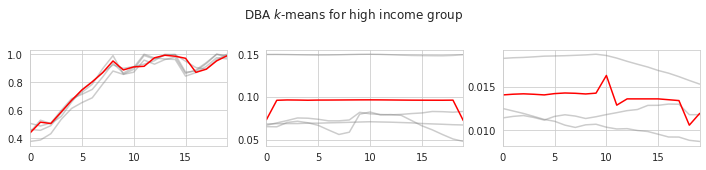

In [ ]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12, 6))
for yi in range(3):
    plt.subplot(3, 3, 1 + yi)
    #for label in set(y_pred):
    for xx in X_train[y_pred == yi]:
        plt.plot(xx,c="gray",alpha=0.4)
    
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")    
    plt.xlim(0, sz-1)
    #plt.ylim(-1, 1)
    #plt.text(0.4, -0.4,'Cluster %d' % (yi + 1),
          #   transform=plt.gca().transAxes)
plt.suptitle("DBA $k$-means for high income group")          
plt.show()


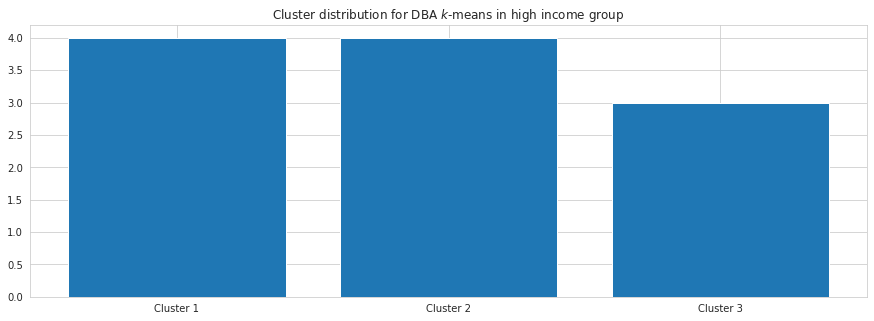

In [ ]:
cluster_c = [len(y_pred[y_pred==i]) for i in range(3)]
cluster_n = ["Cluster "+str(i+1) for i in range(3)]
plt.figure(figsize=(15,5))
plt.title("Cluster distribution for DBA $k$-means in high income group")
plt.bar(cluster_n,cluster_c)
plt.show()

In [ ]:
names_for_labels = [f"Cluster {label+1}" for label in y_pred]
clustering_high_income = pd.DataFrame(zip(df_cluster1.columns,names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster").reset_index().drop(['index'],axis=1)
clustering_high_income

,Series,Cluster
0,gdp_current,Cluster 1
1,gdp_per_capita,Cluster 1
2,health expenditure (per capita),Cluster 1
3,Income,Cluster 1
4,Mental disorders prevalence (Percent),Cluster 2
5,health expenditure (% GDP),Cluster 2
6,unemployment rate (percent),Cluster 2
7,Mental disorders burden (Percent),Cluster 2
8,Share of deaths from suicide (Percent),Cluster 3
9,Mental and substance use disorder deaths (Rate),Cluster 3


In [ ]:
clustering_high_income.to_csv('./clustering_high_income.csv',index=False)

## Upper middle income

In [ ]:
df_cluster2 = df_cluster.loc[df_cluster['Entity']=="Upper middle income"].drop(['Entity','Year'],axis=1)

In [ ]:
X_train = df_cluster2.to_numpy()
X_train = X_train.transpose()
sz = X_train.shape[1]

In [ ]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=0)
y_pred = dba_km.fit_predict(X_train)

DBA k-means
Init 1
0.019 --> 0.008 --> 0.008 --> 
Init 2
0.019 --> 0.009 --> 0.009 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Text(0.5, 0.98, 'DBA $k$-means for upper middle income group')

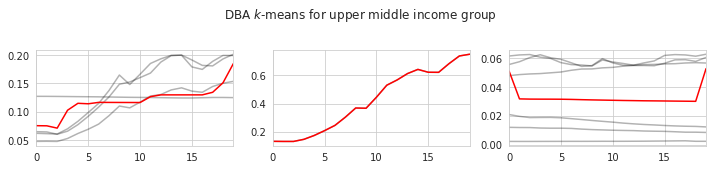

In [ ]:
fig = plt.figure(figsize=(12, 6))
for yi in range(3):
    plt.subplot(3, 3, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.3)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz-1)
    #plt.ylim(-1, 1)
    #plt.text(0.4, -0.4,'Cluster %d' % (yi + 1),
     #        transform=plt.gca().transAxes)
    #if yi == 1:
plt.suptitle("DBA $k$-means for upper middle income group")

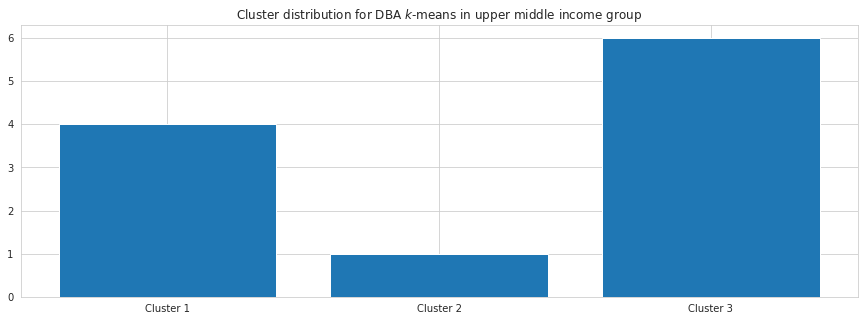

In [ ]:
cluster_c = [len(y_pred[y_pred==i]) for i in range(3)]
cluster_n = ["Cluster "+str(i+1) for i in range(3)]
plt.figure(figsize=(15,5))
plt.title("Cluster distribution for DBA $k$-means in upper middle income group")
plt.bar(cluster_n,cluster_c)
plt.show()

In [ ]:
names_for_labels = [f"Cluster {label+1}" for label in y_pred]
clustering_upper_middle_income = pd.DataFrame(zip(df_cluster2.columns,names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster").reset_index().drop(['index'],axis=1)
clustering_upper_middle_income

,Series,Cluster
0,Mental disorders prevalence (Percent),Cluster 1
1,gdp_per_capita,Cluster 1
2,health expenditure (per capita),Cluster 1
3,Income,Cluster 1
4,gdp_current,Cluster 2
5,Share of deaths from suicide (Percent),Cluster 3
6,Mental and substance use disorder deaths (Rate),Cluster 3
7,health expenditure (% GDP),Cluster 3
8,unemployment rate (percent),Cluster 3
9,Mental disorders burden (Percent),Cluster 3


In [ ]:
clustering_upper_middle_income.to_csv('./clustering_upper_middle_income.csv',index=False)

## Lower middle income

In [ ]:
df_cluster3 = df_cluster.loc[df_cluster['Entity']=="Lower middle income"].drop(['Entity','Year'],axis=1)

In [ ]:
X_train = df_cluster3.to_numpy()
X_train = X_train.transpose()
sz = X_train.shape[1]

In [ ]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=0)
y_pred = dba_km.fit_predict(X_train)

DBA k-means
Init 1
0.006 --> 0.005 --> 0.005 --> 
Init 2
0.012 --> 0.003 --> 0.003 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Text(0.5, 0.98, 'DBA $k$-means for lower middle income group')

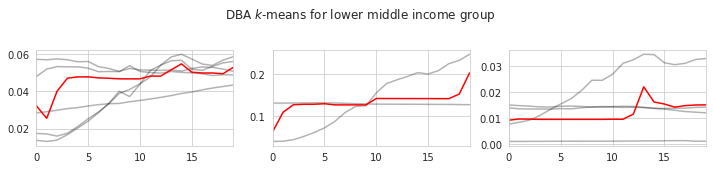

In [ ]:
fig = plt.figure(figsize=(12, 6))
for yi in range(3):
    plt.subplot(3, 3, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.3)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz-1)
    #plt.ylim(-1, 1)
    #plt.text(0.4, -0.4,'Cluster %d' % (yi + 1),
     #        transform=plt.gca().transAxes)
    #if yi == 1:
plt.suptitle("DBA $k$-means for lower middle income group")

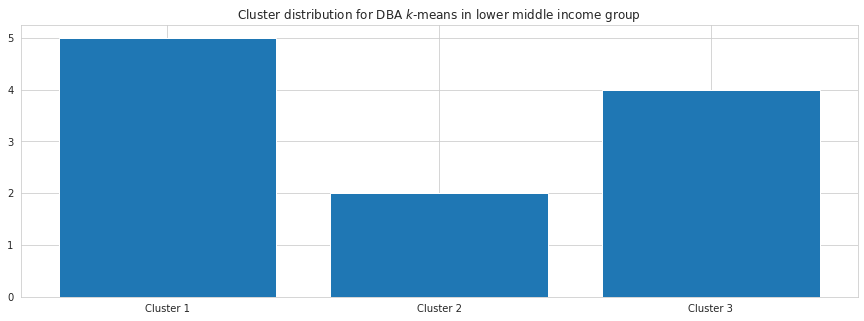

In [ ]:
cluster_c = [len(y_pred[y_pred==i]) for i in range(3)]
cluster_n = ["Cluster "+str(i+1) for i in range(3)]
plt.figure(figsize=(15,5))
plt.title("Cluster distribution for DBA $k$-means in lower middle income group")
plt.bar(cluster_n,cluster_c)
plt.show()

In [ ]:
names_for_labels = [f"Cluster {label+1}" for label in y_pred]
clustering_lower_middle_income = pd.DataFrame(zip(df_cluster3.columns,names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster").reset_index().drop(['index'],axis=1)
clustering_lower_middle_income

,Series,Cluster
0,gdp_per_capita,Cluster 1
1,health expenditure (% GDP),Cluster 1
2,unemployment rate (percent),Cluster 1
3,Income,Cluster 1
4,Mental disorders burden (Percent),Cluster 1
5,Mental disorders prevalence (Percent),Cluster 2
6,gdp_current,Cluster 2
7,Share of deaths from suicide (Percent),Cluster 3
8,Mental and substance use disorder deaths (Rate),Cluster 3
9,health expenditure (per capita),Cluster 3


In [ ]:
clustering_lower_middle_income.to_csv('./clustering_lower_middle_income.csv',index=False)

## Low income

In [ ]:
df_cluster4 = df_cluster.loc[df_cluster['Entity']=="Low income"].drop(['Entity','Year'],axis=1)

In [ ]:
X_train = df_cluster4.to_numpy()
X_train = X_train.transpose()
sz = X_train.shape[1]

In [ ]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=0)
y_pred = dba_km.fit_predict(X_train)

DBA k-means
Init 1
0.001 --> 0.001 --> 0.001 --> 0.001 --> 
Init 2
0.001 --> 0.001 --> 0.001 --> 0.001 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Text(0.5, 0.98, 'DBA $k$-means for low income group')

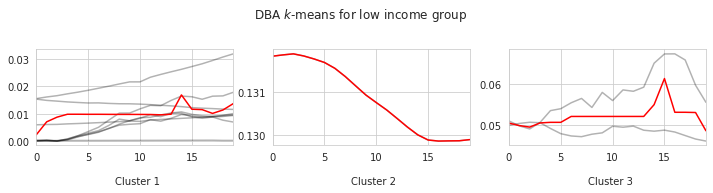

In [ ]:
fig = plt.figure(figsize=(12, 6))
for yi in range(3):
    plt.subplot(3, 3, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.3)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz-1)
    #plt.ylim(-1, 1)
    plt.text(0.4, -0.4,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    #if yi == 1:
plt.suptitle("DBA $k$-means for low income group")

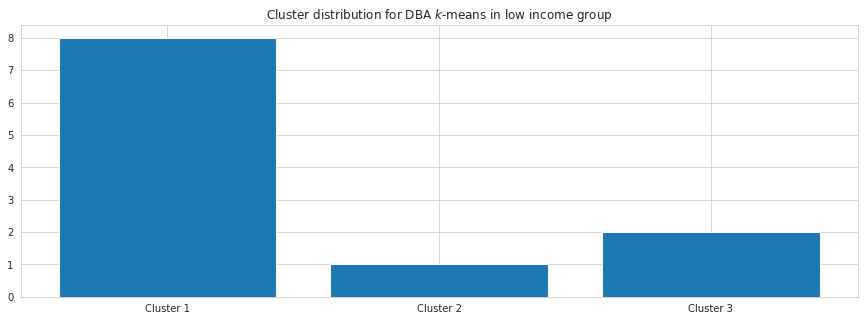

In [ ]:
cluster_c = [len(y_pred[y_pred==i]) for i in range(3)]
cluster_n = ["Cluster "+str(i+1) for i in range(3)]
plt.figure(figsize=(15,5))
plt.title("Cluster distribution for DBA $k$-means in low income group")
plt.bar(cluster_n,cluster_c)
plt.show()

In [ ]:
names_for_labels = [f"Cluster {label+1}" for label in y_pred]
clustering_low_income = pd.DataFrame(zip(df_cluster4.columns,names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster").reset_index().drop(['index'],axis=1)
clustering_low_income

,Series,Cluster
0,Share of deaths from suicide (Percent),Cluster 1
1,Mental and substance use disorder deaths (Rate),Cluster 1
2,gdp_current,Cluster 1
3,gdp_per_capita,Cluster 1
4,health expenditure (per capita),Cluster 1
5,Income,Cluster 1
6,Mental disorders burden (Percent),Cluster 1
7,Suicide rate,Cluster 1
8,Mental disorders prevalence (Percent),Cluster 2
9,health expenditure (% GDP),Cluster 3


In [ ]:
clustering_low_income.to_csv('./clustering_low_income.csv',index=False)